### Import Necessary Libraries

In [650]:
# general
from tqdm import tqdm
from datetime import datetime

# matrix manipulation
import numpy as np

# data handling
import pandas as pd

# plotting
import matplotlib.pyplot as plt

# portfolio optimization & data fetcher
import cvxportfolio as cvx
import cvxpy as cvpx

### Load Data

In [545]:
START_TIMESTAMP = '2020-01-01 03:45:00+00:00'
SYMBOLS = ['TATAMOTORS.NS', 'TATASTEEL.NS', 'TATAPOWER.NS', 'ONGC.NS', 'CESC.NS', 'EXIDEIND.NS', 'SUZLON.NS', 'NTPC.NS']

In [777]:
# download the data
data = cvx.DownloadedMarketData(SYMBOLS)

# truncate the data to keep data starting from `START_TIMESTAMP`
data = cvx.UserProvidedMarketData(
    data.returns.loc[data.returns.index >= pd.Timestamp(START_TIMESTAMP)], 
    prices=data.prices.loc[data.prices.index >= pd.Timestamp(START_TIMESTAMP)],
    volumes=data.volumes.loc[data.volumes.index >= pd.Timestamp(START_TIMESTAMP)]
    )

Updating data........


In [715]:
data.prices

,CESC.NS,EXIDEIND.NS,NTPC.NS,ONGC.NS,SUZLON.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS
2020-01-01 03:45:00+00:00,74.110001,186.899994,119.050003,128.750000,1.698695,185.149994,56.799999,NaN
2020-01-02 03:45:00+00:00,75.000000,186.699997,121.500000,127.650002,1.744606,185.000000,57.900002,NaN
2020-01-03 03:45:00+00:00,75.300003,188.800003,121.000000,131.000000,2.479177,192.899994,58.000000,NaN
2020-01-06 03:45:00+00:00,74.000000,184.000000,119.000000,129.699997,2.708731,191.000000,57.049999,NaN
2020-01-07 03:45:00+00:00,73.495003,181.600006,119.250000,125.599998,3.167838,187.000000,57.099998,NaN
...,...,...,...,...,...,...,...,...
2024-09-13 03:45:00+00:00,196.000000,479.799988,404.850006,295.700012,82.139999,994.900024,446.000000,152.779999
2024-09-16 03:45:00+00:00,198.500000,489.450012,402.450012,294.799988,83.879997,997.000000,443.500000,155.000000
2024-09-17 03:45:00+00:00,196.000000,493.100006,411.850006,293.700012,85.180000,995.000000,443.350006,154.000000
2024-09-18 03:45:00+00:00,190.830002,481.000000,418.500000,297.600006,82.199997,978.200012,445.500000,152.399994


Text(0.5, 1.0, 'Stock Prices over last 4 years')

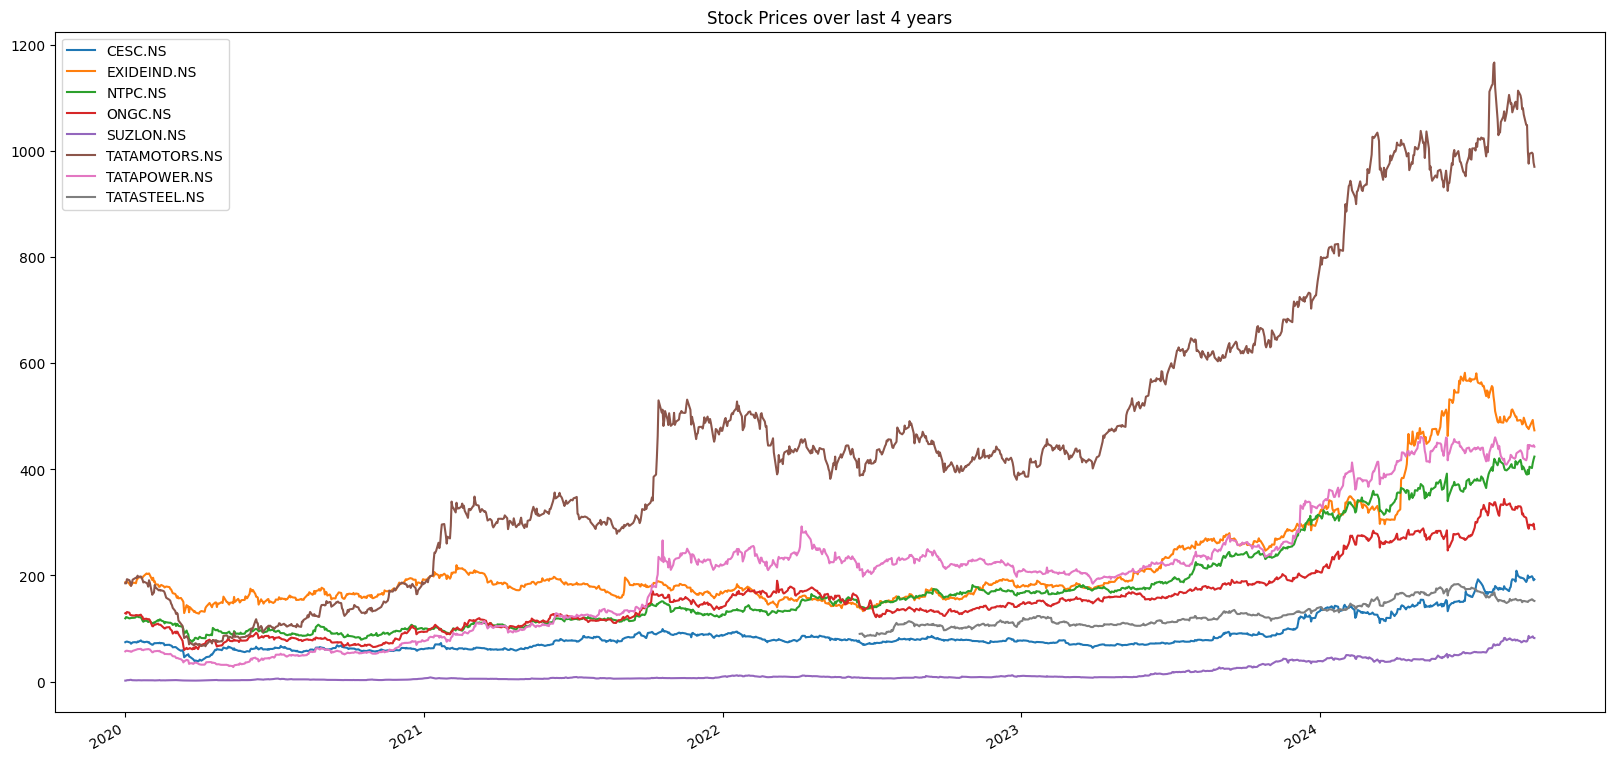

In [716]:
# plot the data
data.prices.plot(figsize=(20, 10))
plt.title('Stock Prices over last 4 years')

### Standard Mean-Variance Portfolio Optimization

In [717]:
# Anualized Mean Returns
mean_returns = data.returns.drop('USDOLLAR', axis=1).dropna().mean() * 252

# Annualized Variance Returns
mean_cov = data.returns.drop('USDOLLAR', axis=1).dropna().cov() * 252

/var/folders/mg/l90d6s9536n6mfzjbqgrxffm0000gn/T/ipykernel_47426/3294078174.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels([''] + list(mean_cov.columns))


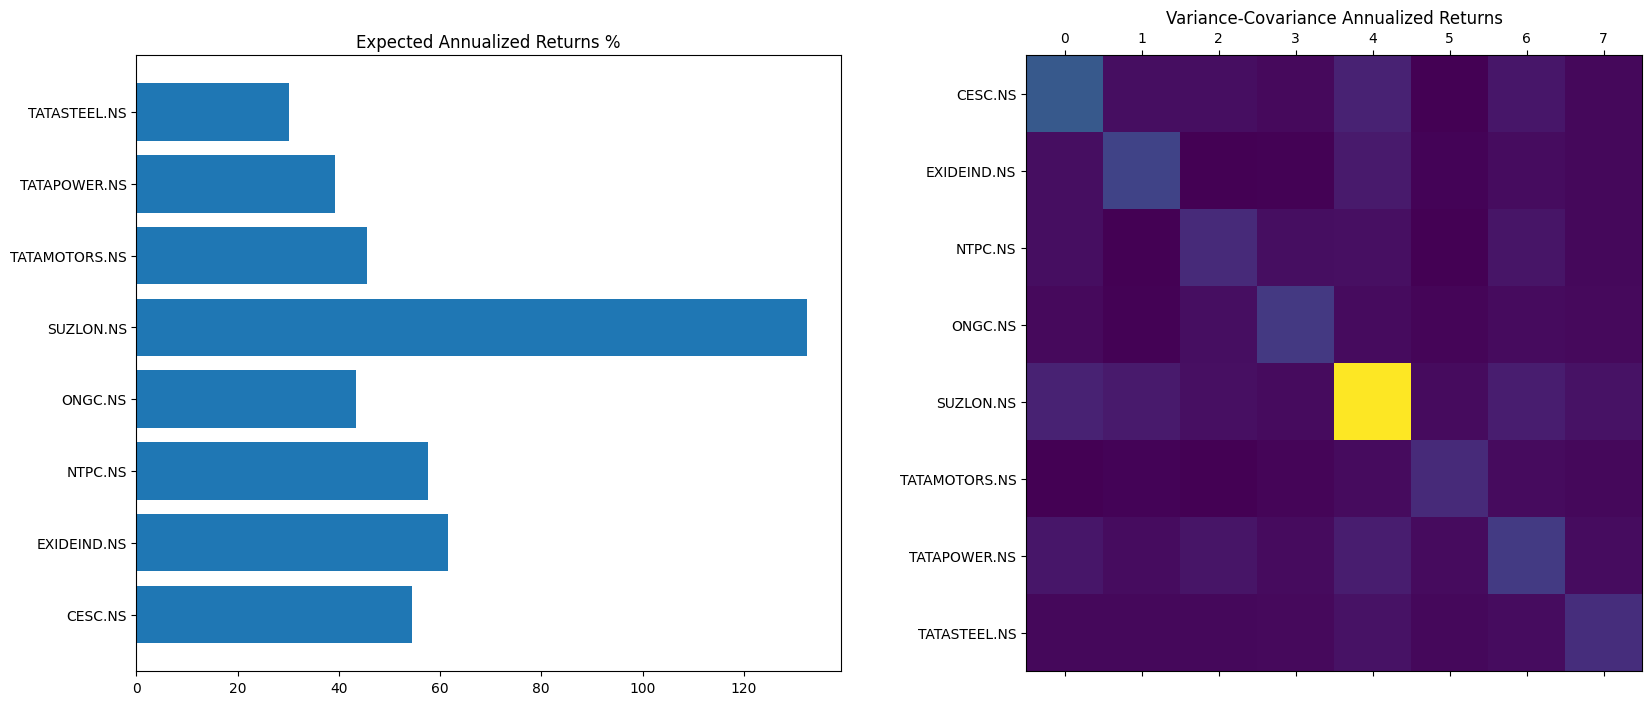

In [718]:
# plot the stats of the assets' return
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].barh(mean_returns.index, mean_returns * 100)
axes[0].set_title('Expected Annualized Returns %')

axes[1].matshow(mean_cov)
axes[1].set_title('Variance-Covariance Annualized Returns')
axes[1].set_yticklabels([''] + list(mean_cov.columns))

plt.show()

In [719]:
# stores the portfolio returns and variances for random weighted portfolio
expected_portfolio_returns = list()
std_portfolio_returns = list()

for _ in tqdm(range(10000)):

    # generate random weights from Unif(0, 1)
    random_weights = np.random.random(len(SYMBOLS))

    # normalize the weights
    random_weights = random_weights / np.sum(np.abs(random_weights))

    # excpected portfolio returns
    portfolio_return = random_weights.dot(mean_returns)
    expected_portfolio_returns.append(portfolio_return)
    
    # expected portfolio variance
    portfolio_variance = (random_weights[np.newaxis,:] @ mean_cov @ random_weights[:, np.newaxis]).values.item()
    std_portfolio_returns.append(np.sqrt(portfolio_variance))

# converting the values to percentage
expected_portfolio_returns = np.array(expected_portfolio_returns) * 100
std_portfolio_returns = np.array(std_portfolio_returns) * 100

100%|██████████| 10000/10000 [00:01<00:00, 8227.75it/s]


In [720]:
def minimize_std_at_return(expected_return, mean_returns, mean_covariance):

    # Number of variables
    n = mean_returns.shape[0]

    # The variables vector
    x = cvpx.Variable(n)

    # The expected return
    req_return = expected_return

    # The return
    ret = sum(cvpx.multiply(mean_returns, x))

    # The risk in xT.Q.x format
    risk = cvpx.quad_form(x, mean_covariance)

    # The core problem definition with the Problem class from CVXPY
    prob = cvpx.Problem(cvpx.Minimize(risk), [sum(x)==1, ret == req_return, x >= 0])

    # solve the problem and return the result
    try:
        prob.solve()
        return {'x': x.value, 'ret': ret.value, 'std': np.sqrt(risk.value)}
    except:
        print ("Error")
        return None

In [721]:
# compute the efficient frontier
efficient_frontier = list()

for ret in tqdm(np.arange(np.min(expected_portfolio_returns), np.quantile(expected_portfolio_returns, 0.9999), 1)/100):
    std = minimize_std_at_return(ret, mean_returns, mean_cov)['std']
    efficient_frontier.append([std*100, ret*100])

efficient_frontier = np.array(efficient_frontier)

100%|██████████| 43/43 [00:00<00:00, 215.07it/s]


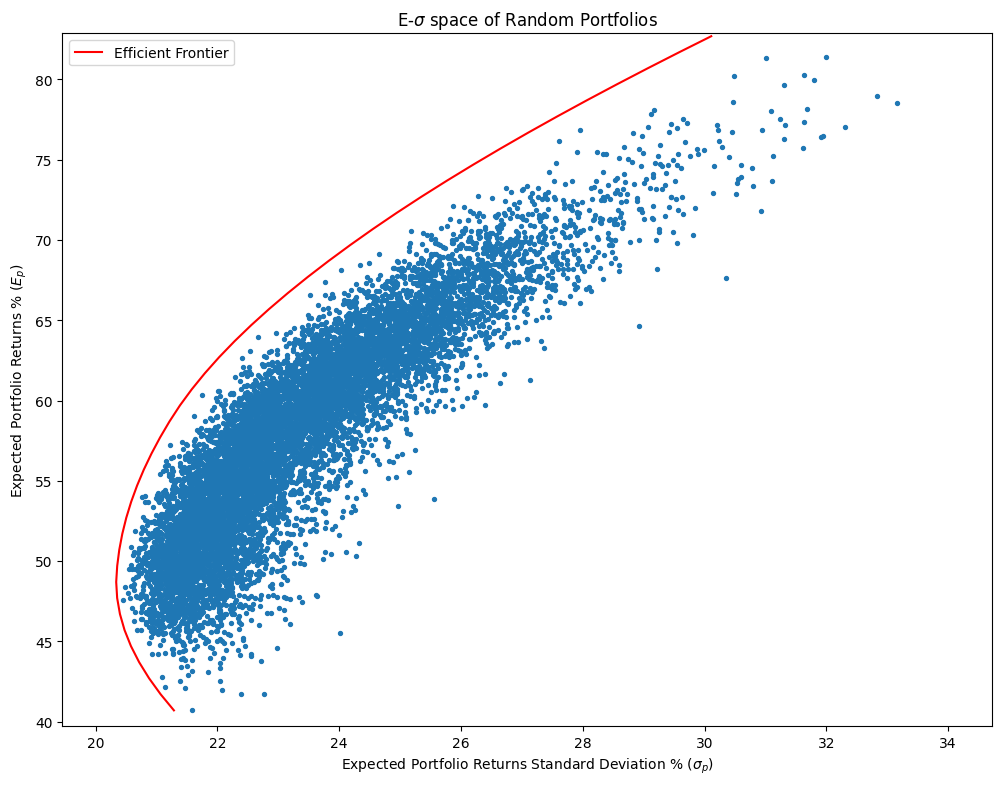

In [722]:
plt.figure(figsize=(12, 9))
plt.scatter(std_portfolio_returns, expected_portfolio_returns, s=8)
plt.title('E-$\sigma$ space of Random Portfolios')
plt.xlabel('Expected Portfolio Returns Standard Deviation % ($\sigma_p$)')
plt.ylabel('Expected Portfolio Returns % ($E_p$)')

plt.xlim(np.min(std_portfolio_returns)-1, np.quantile(std_portfolio_returns, 0.9999))
plt.ylim(np.min(expected_portfolio_returns)-1, np.quantile(expected_portfolio_returns, 0.9999))

plt.plot(efficient_frontier[:,0], efficient_frontier[:,1], color='red', label='Efficient Frontier')
plt.legend()
plt.show()

In [844]:
a = minimize_std_at_return(48.69549998/100, mean_returns, mean_cov)

Index(['CESC.NS', 'EXIDEIND.NS', 'NTPC.NS', 'ONGC.NS', 'SUZLON.NS',
       'TATAMOTORS.NS', 'TATAPOWER.NS', 'TATASTEEL.NS'],
      dtype='object')

In [849]:
for name, weight in zip(mean_returns.index, a['x'] * 100):
    print(name, ': ', weight)

CESC.NS :  6.6240120002574985
EXIDEIND.NS :  14.868359121343172
NTPC.NS :  23.473714179508935
ONGC.NS :  13.03707598288909
SUZLON.NS :  -1.1112715749524697e-20
TATAMOTORS.NS :  26.54670343007195
TATAPOWER.NS :  1.1628791483002415e-21
TATASTEEL.NS :  15.450135285929345


In [841]:
efficient_frontier[efficient_frontier[:,0].argmin()]

array([20.33759331, 48.69549998])

### Portfolio Optimization Objective

In [804]:
# risk aversion parameter
GAMMA = 5

# objective function
objective = cvx.ReturnsForecast() - GAMMA * cvx.FullCovariance() - cvx.StocksTransactionCost(a=0, pershare_cost=0.1)

# constraints
constraints = [cvx.LongOnly(applies_to_cash=True), cvx.LeverageLimit(1)]

# initial capital
INITIAL_CAPITAL = 100000

In [805]:
# Market Data Simulator for backtesting
simulator = cvx.MarketSimulator(market_data=data)

### Backtesting

#### Single-Period Portfolio Optimization Strategy 

In [851]:
# single period optimization policy
policy = cvx.SinglePeriodOptimization(objective, constraints)

In [816]:
# Backtesting
results_spo = simulator.backtest(policy, initial_value=INITIAL_CAPITAL)
print(results_spo)


#################################################################
Universe size                                                   9
Initial timestamp                       2020-12-29 03:45:00+00:00
Final timestamp                         2024-09-19 03:45:00+00:00
Number of periods                                             921
Initial value (USDOLLAR)                                1.000e+05
Final value (USDOLLAR)                                  1.744e+05
Profit (USDOLLAR)                                       7.441e+04
                                                                 
Avg. return (annualized)                                    15.6%
Volatility (annualized)                                     11.4%
Avg. excess return (annualized)                             12.9%
Avg. active return (annualized)                             12.9%
Excess volatility (annualized)                              11.4%
Active volatility (annualized)                              11.4%
         

/Users/rishideychowdhury/Desktop/MULTIPERIOD-PORTFOLIO-OPTIMIZATION/env/lib/python3.8/site-packages/cvxportfolio/result.py:993: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() # pragma: no cover


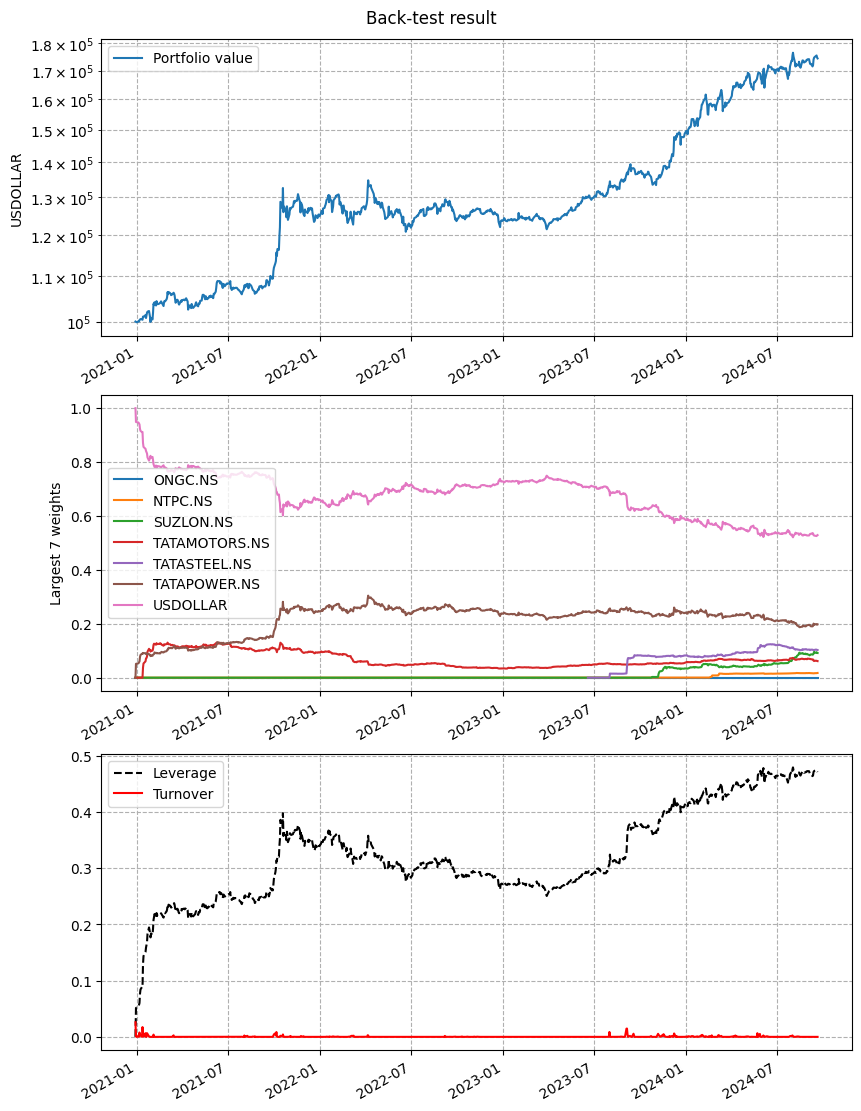

In [817]:
plot_res = results_spo.plot()
plt.show()

In [853]:
h = pd.Series(0, SYMBOLS)
h['USDOLLAR'] = 100000
h

TATAMOTORS.NS         0
TATASTEEL.NS          0
TATAPOWER.NS          0
ONGC.NS               0
CESC.NS               0
EXIDEIND.NS           0
SUZLON.NS             0
NTPC.NS               0
USDOLLAR         100000
dtype: int64

In [856]:
spo_exec = policy.execute(h, market_data=data, t=data.trading_calendar()[-2])
spo_exec

(CESC.NS              0.006913
 EXIDEIND.NS          0.012053
 NTPC.NS           7682.767130
 ONGC.NS              0.016610
 SUZLON.NS         9909.370766
 TATAMOTORS.NS     8131.930308
 TATAPOWER.NS     11821.620874
 TATASTEEL.NS         0.007667
 USDOLLAR        -37545.732321
 dtype: float64,
 Timestamp('2024-09-18 03:45:00+0000', tz='UTC'),
 CESC.NS            0
 EXIDEIND.NS        0
 NTPC.NS           18
 ONGC.NS            0
 SUZLON.NS        121
 TATAMOTORS.NS      8
 TATAPOWER.NS      27
 TATASTEEL.NS       0
 dtype: int64)

In [860]:
spo_exec[0].drop('USDOLLAR') / spo_exec[0].drop('USDOLLAR').sum() * 100

CESC.NS           0.000018
EXIDEIND.NS       0.000032
NTPC.NS          20.462425
ONGC.NS           0.000044
SUZLON.NS        26.392802
TATAMOTORS.NS    21.658734
TATAPOWER.NS     31.485924
TATASTEEL.NS      0.000020
dtype: float64

#### Multi-Period Portfolio Optimization Strategy 

In [861]:
# multi-period optimization policy
policy = cvx.MultiPeriodOptimization(objective, constraints, planning_horizon=5)

In [813]:
# Backtesting
results_mpo = simulator.backtest(policy, initial_value=INITIAL_CAPITAL)
print(results_mpo)


#################################################################
Universe size                                                   9
Initial timestamp                       2020-12-29 03:45:00+00:00
Final timestamp                         2024-09-19 03:45:00+00:00
Number of periods                                             921
Initial value (USDOLLAR)                                1.000e+05
Final value (USDOLLAR)                                  2.445e+05
Profit (USDOLLAR)                                       1.445e+05
                                                                 
Avg. return (annualized)                                    25.2%
Volatility (annualized)                                     15.6%
Avg. excess return (annualized)                             22.5%
Avg. active return (annualized)                             22.5%
Excess volatility (annualized)                              15.6%
Active volatility (annualized)                              15.6%
         

/Users/rishideychowdhury/Desktop/MULTIPERIOD-PORTFOLIO-OPTIMIZATION/env/lib/python3.8/site-packages/cvxportfolio/result.py:993: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() # pragma: no cover


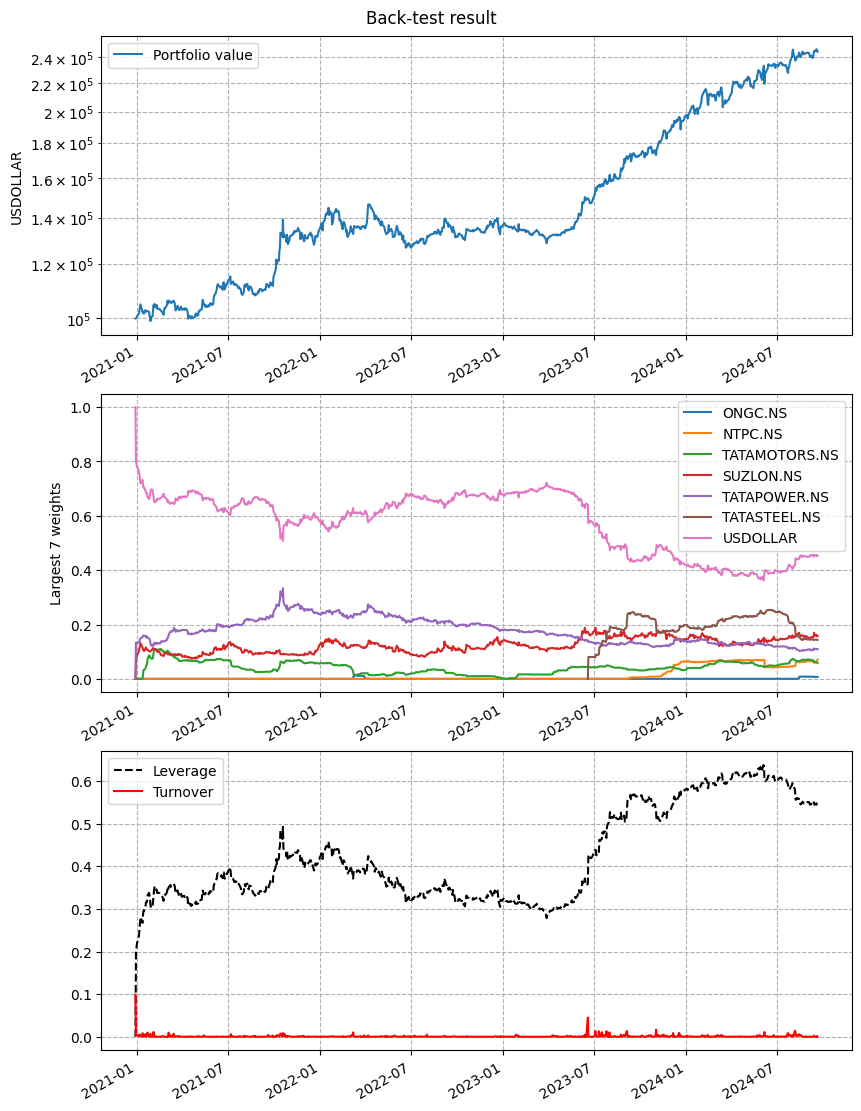

In [814]:
plot_res = results_mpo.plot()
plt.show()

In [862]:
h = pd.Series(0, SYMBOLS)
h['USDOLLAR'] = 100000
h

TATAMOTORS.NS         0
TATASTEEL.NS          0
TATAPOWER.NS          0
ONGC.NS               0
CESC.NS               0
EXIDEIND.NS           0
SUZLON.NS             0
NTPC.NS               0
USDOLLAR         100000
dtype: int64

In [864]:
mpo_exec = policy.execute(h, market_data=data, t=data.trading_calendar()[-2])
mpo_exec

(CESC.NS              0.009259
 EXIDEIND.NS          0.001847
 NTPC.NS           9897.315583
 ONGC.NS              0.014453
 SUZLON.NS        14234.428521
 TATAMOTORS.NS     6314.753269
 TATAPOWER.NS     11800.385606
 TATASTEEL.NS      5854.228344
 USDOLLAR        -48101.136883
 dtype: float64,
 Timestamp('2024-09-18 03:45:00+0000', tz='UTC'),
 CESC.NS            0
 EXIDEIND.NS        0
 NTPC.NS           24
 ONGC.NS            0
 SUZLON.NS        173
 TATAMOTORS.NS      6
 TATAPOWER.NS      26
 TATASTEEL.NS      38
 dtype: int64)

In [865]:
mpo_exec[0].drop('USDOLLAR') / mpo_exec[0].drop('USDOLLAR').sum() * 100

CESC.NS           0.000019
EXIDEIND.NS       0.000004
NTPC.NS          20.576053
ONGC.NS           0.000030
SUZLON.NS        29.592707
TATAMOTORS.NS    13.128075
TATAPOWER.NS     24.532446
TATASTEEL.NS     12.170665
dtype: float64

### Efficient Frontier Comparison

In [ ]:
policies_spo = list()

# sweep over risk aversion
for gamma_risk in np.linspace(0, 5, 30):
    policies_spo.append(cvx.SinglePeriodOptimization(
        # objective function
        cvx.ReturnsForecast() - gamma_risk * cvx.FullCovariance() - cvx.StocksTransactionCost(a=0, pershare_cost=0.1),
        # constraints
        constraints,
        )
    )

efficient_frontier_results_spo = simulator.backtest_many(policies_spo)

In [827]:
policies_mpo = list()

# sweep over risk aversion
for gamma_risk in np.linspace(0, 5, 30):
    policies_mpo.append(cvx.MultiPeriodOptimization(
        # objective function
        cvx.ReturnsForecast() - gamma_risk * cvx.FullCovariance() - cvx.StocksTransactionCost(a=0, pershare_cost=0.1),
        # constraints
        constraints,
        planning_horizon=5,
        )
    )

efficient_frontier_results_mpo = simulator.backtest_many(policies_mpo)

Text(0, 0.5, 'Excess return (annualized)')

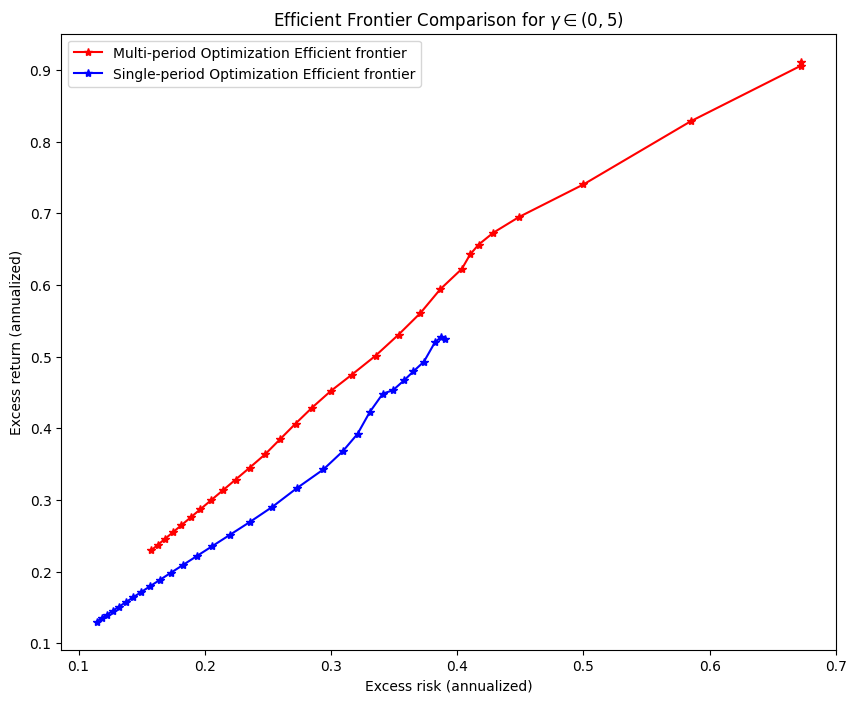

In [838]:
# multi-period vs single-period optimization efficient frontier
efficient_frontier_figure = plt.figure(figsize=(10,8))
plt.plot(
    [result.excess_returns.std() * np.sqrt(252) for result in efficient_frontier_results_mpo],
    [result.excess_returns.mean() * 252 for result in efficient_frontier_results_mpo],
    'r*-',
    label='Multi-period Optimization Efficient frontier'
    )
plt.plot(
    [result.excess_returns.std() * np.sqrt(252) for result in efficient_frontier_results_spo],
    [result.excess_returns.mean() * 252 for result in efficient_frontier_results_spo],
    'b*-',
    label='Single-period Optimization Efficient frontier'
    )
plt.legend()
plt.title('Efficient Frontier Comparison for $\gamma\in(0,5)$')
plt.xlabel('Excess risk (annualized)')
plt.ylabel('Excess return (annualized)')